# Data Pre-Processing

## Import Data Exploration Tools

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import visualizations
from sklearn import metrics

## Decision Tree Classifier

In [4]:
df = pd.read_csv('in-vehicle-coupon-recommendation_cleaned.csv', index_col=[0])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [6]:
X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1989)

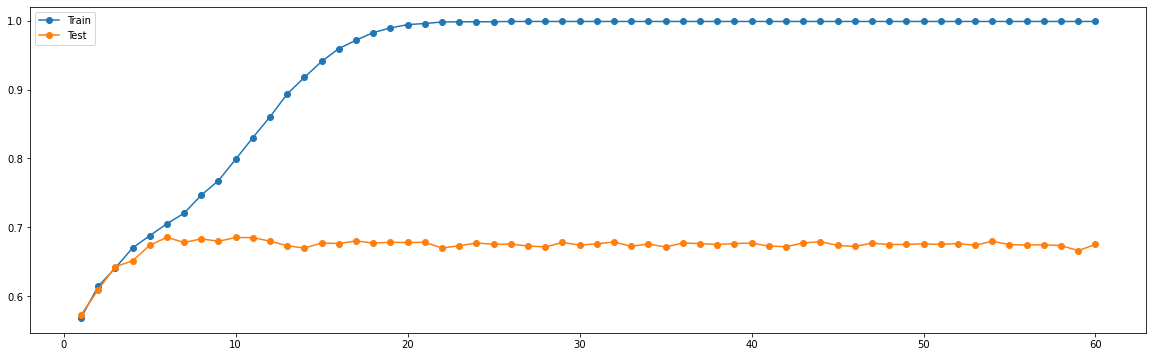

In [7]:
dtree_results = []

for i in range(1, len(X_train.columns)+1):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_train)
    test_predictions = dtree.predict(X_test)
    train_accuracy = metrics.accuracy_score(y_train, predictions)
    test_accuracy = metrics.accuracy_score(y_test, test_predictions)
    dtree_results.append([i, train_accuracy, test_accuracy])

dtree_results = pd.DataFrame(dtree_results, columns=['Depth', 'Train Results', 'Test Results'])
plt.figure(figsize=(20,6))
plt.plot(dtree_results['Depth'], dtree_results[['Train Results', 'Test Results']], marker='o', label=['Train', 'Test'])
plt.legend()
plt.show()

In [8]:
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print('Accuracy: {}'.format(metrics.accuracy_score(y_test, predictions)))

Accuracy: 0.6854778028592927


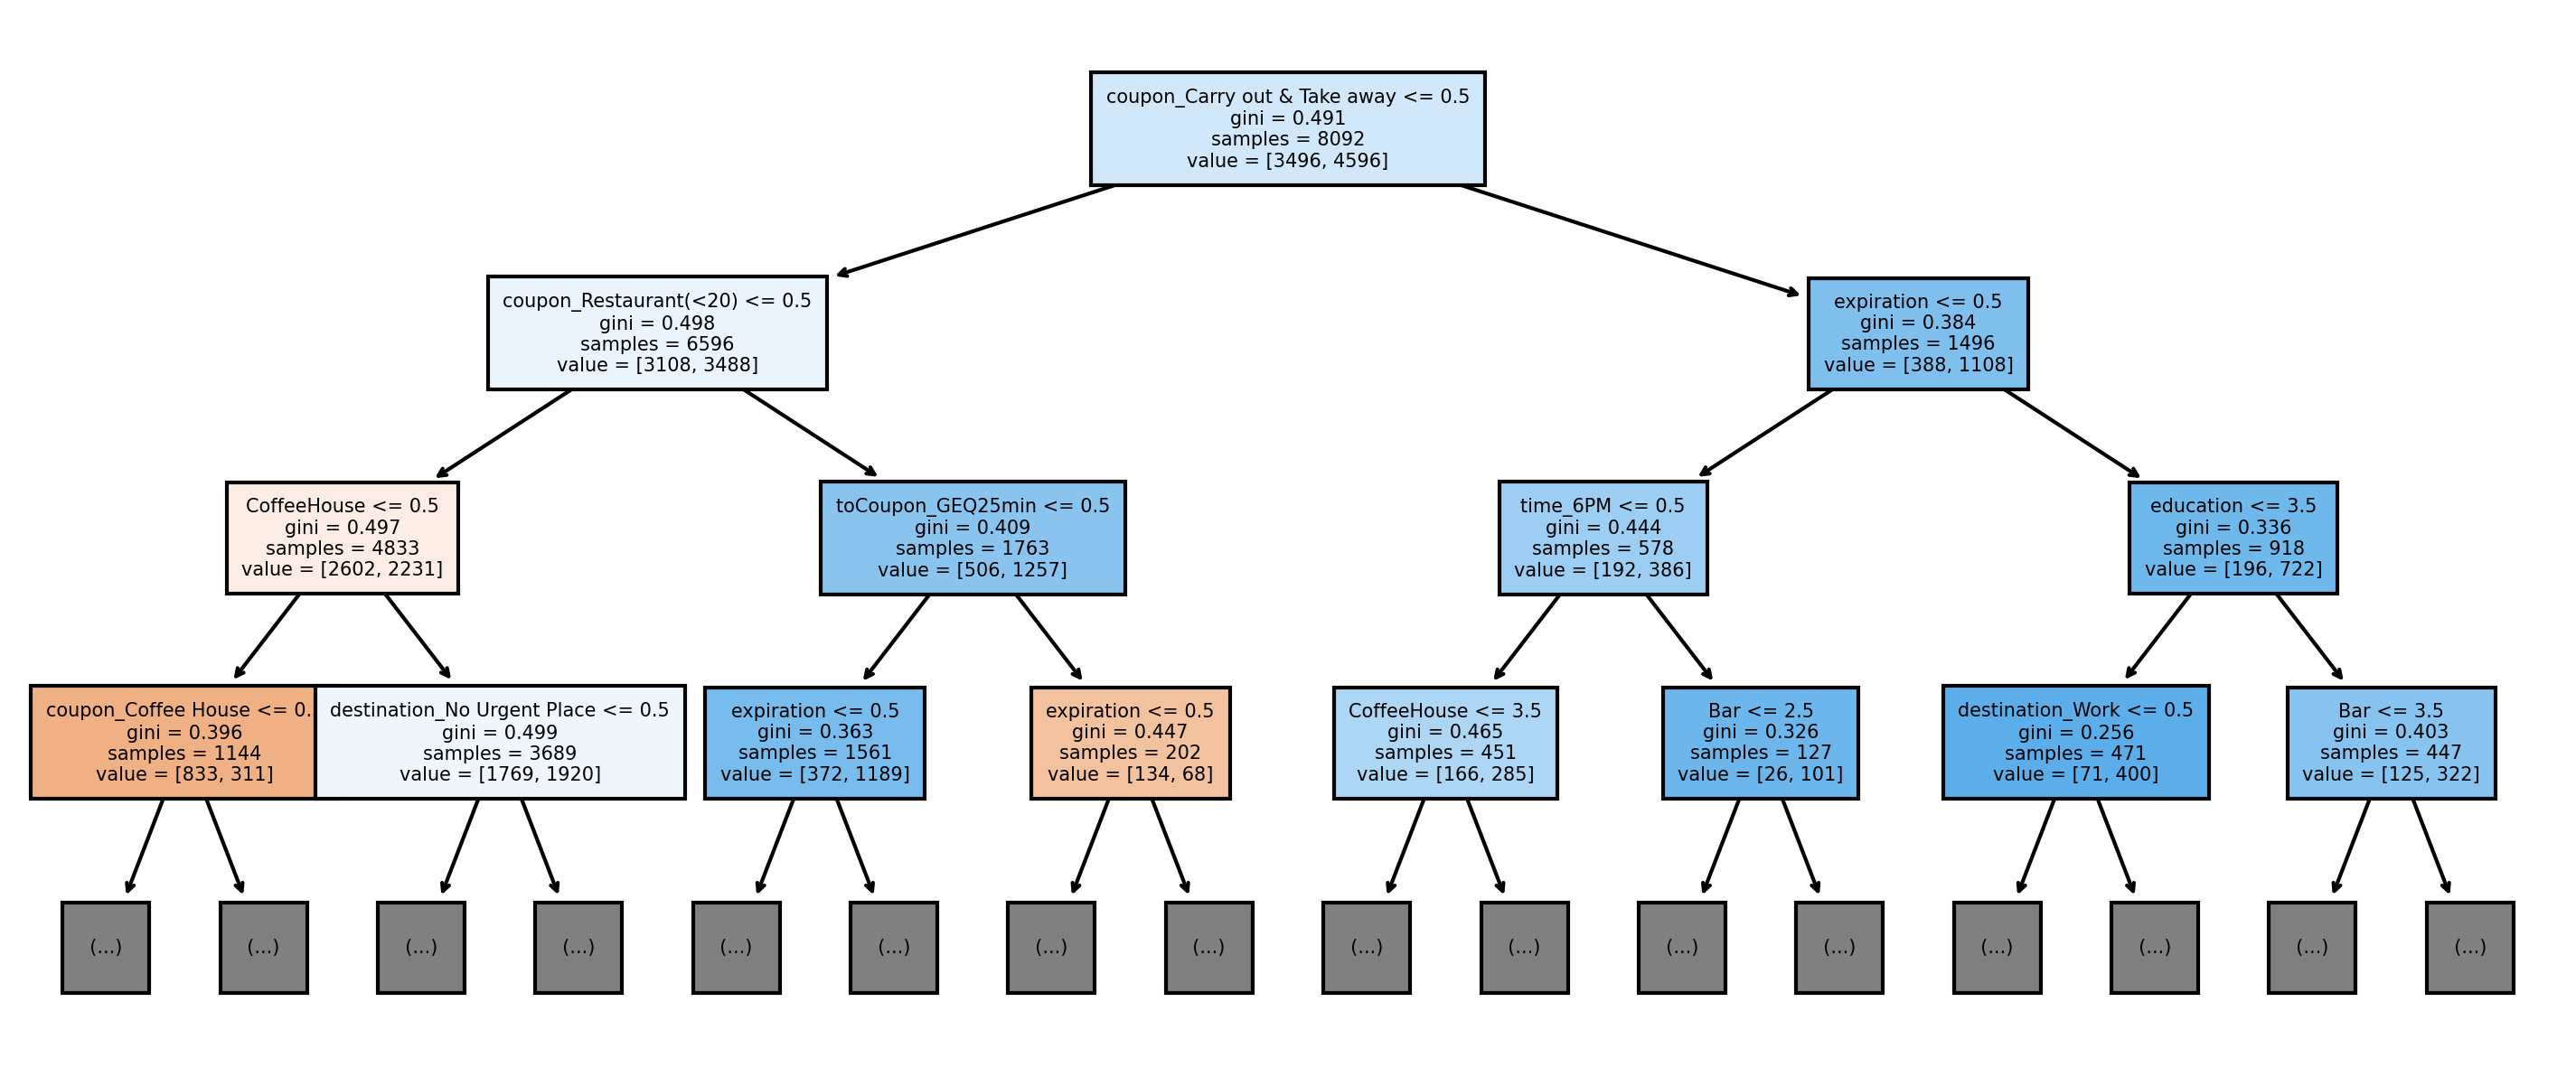

In [9]:
features = X_train.columns
target = y_train
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,5), dpi=300)

tree.plot_tree(dtree, feature_names=features, filled=True, max_depth=3, fontsize=5)
plt.show()

## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
test_range = np.arange(50, 325, 25)
forest_results_n_estimators = []

for i in test_range:
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(X_train, y_train)
    predictions_train = forest.predict(X_train)
    predictions_test = forest.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, predictions_train)
    accuracy_test = metrics.accuracy_score(y_test, predictions_test)
    forest_results_n_estimators.append([i, accuracy_train, accuracy_test]) 

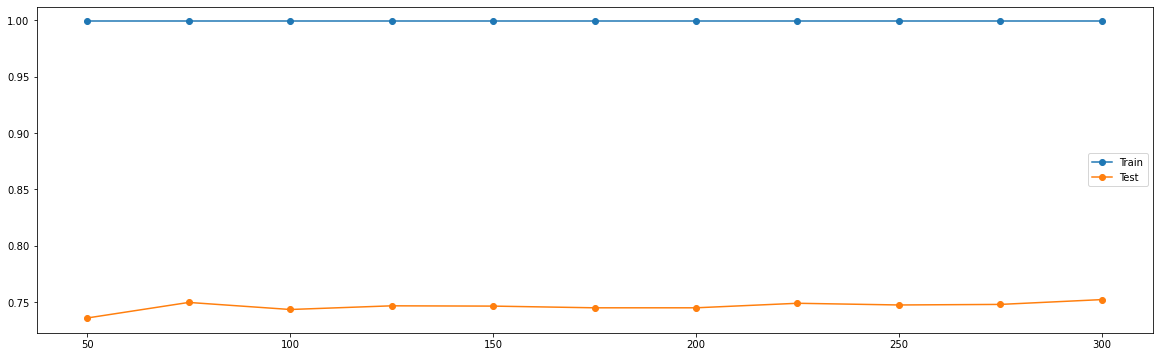

In [13]:
forest_results_n_estimators = pd.DataFrame(forest_results_n_estimators, 
                                           columns=['NumEstimators', 'Train Results', 'Test Results'])

plt.figure(figsize=(20,6))
plt.plot(forest_results_n_estimators['NumEstimators'], forest_results_n_estimators[['Train Results', 'Test Results']], 
         marker='o', label=['Train', 'Test'])
plt.legend()
plt.show()   

In [14]:
forest_results_depth = []

for i in range(1, len(X_train.columns)+1):
    forest = RandomForestClassifier(n_estimators=100, max_depth=i)
    forest.fit(X_train, y_train)
    predictions_train = forest.predict(X_train)
    predictions_test = forest.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, predictions_train)
    accuracy_test = metrics.accuracy_score(y_test, predictions_test)
    forest_results_depth.append([i, accuracy_train, accuracy_test])

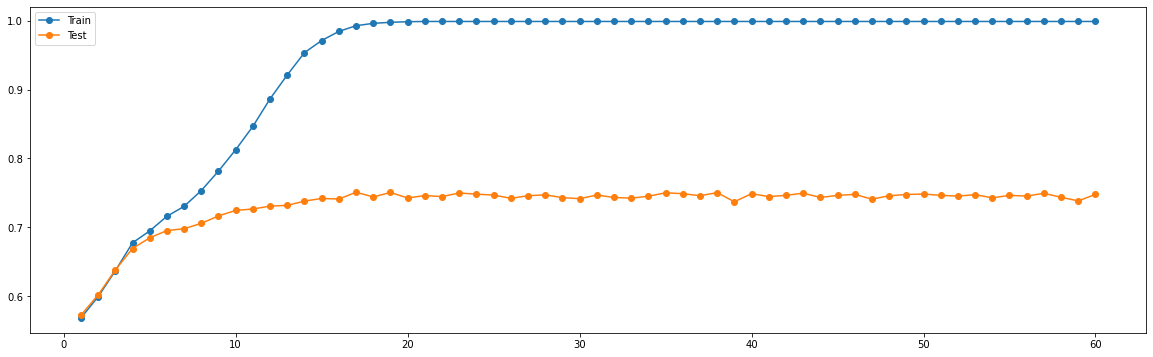

In [15]:
forest_results_depth = pd.DataFrame(forest_results_depth, columns=['Depth', 'Train Results', 'Test Results'])
plt.figure(figsize=(20,6))
plt.plot(forest_results_depth['Depth'], forest_results_depth[['Train Results', 'Test Results']], 
         marker='o', label=['Train', 'Test'])
plt.legend()
plt.show()   

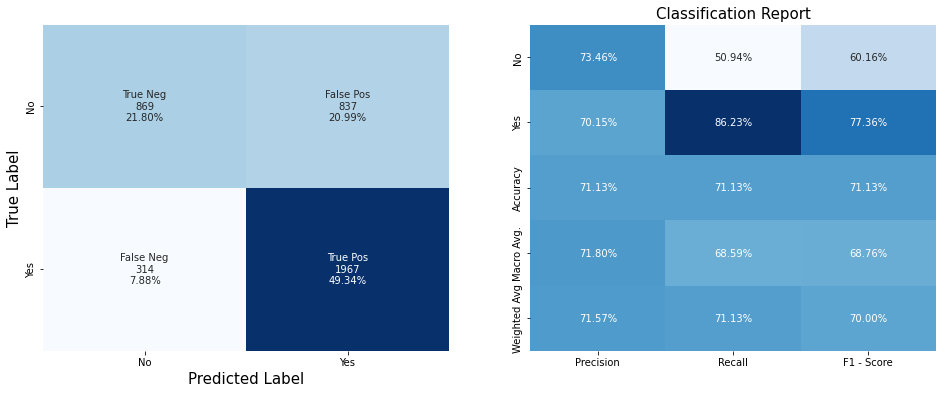

In [16]:
forest = RandomForestClassifier(n_estimators=100, max_depth=8)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
visualizations.class_results(y_test, forest_pred)

## SVM Classification

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [18]:
df = pd.read_csv('in-vehicle-coupon-recommendation_cleaned.csv', index_col=[0])
X = df.drop('Y', axis=1)
y = df['Y']

In [19]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=1989)

In [21]:
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train.ravel())

SVC()

In [22]:
svc_pred = svc_model.predict(X_test)

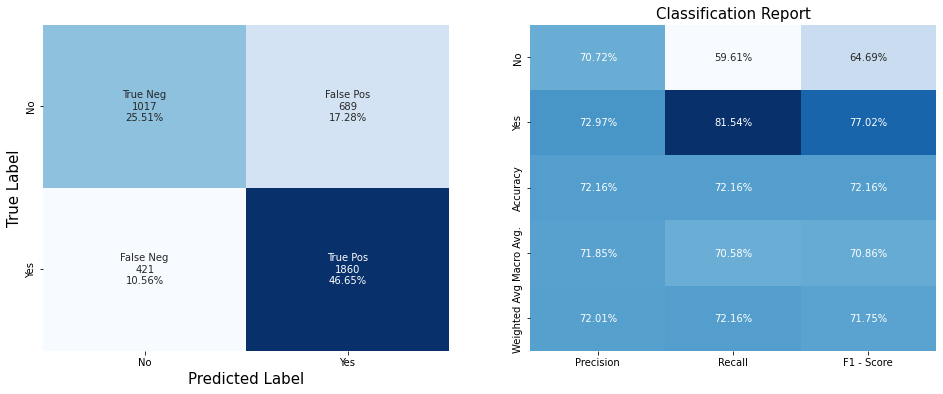

In [23]:
visualizations.class_results(y_test, svc_pred)

### Naive Bayes Classification

In [24]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
nb_predict = classifier.predict(X_test)

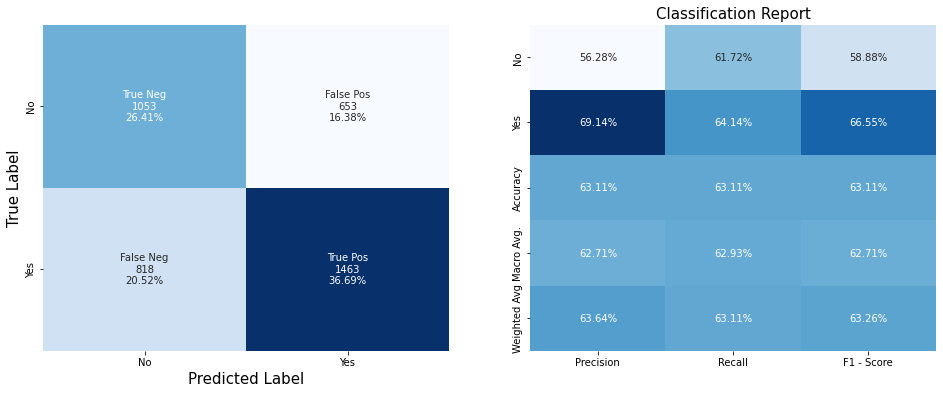

In [26]:
visualizations.class_results(y_test, nb_predict)

### K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [28]:
knn_predict = knn.predict(X_test)

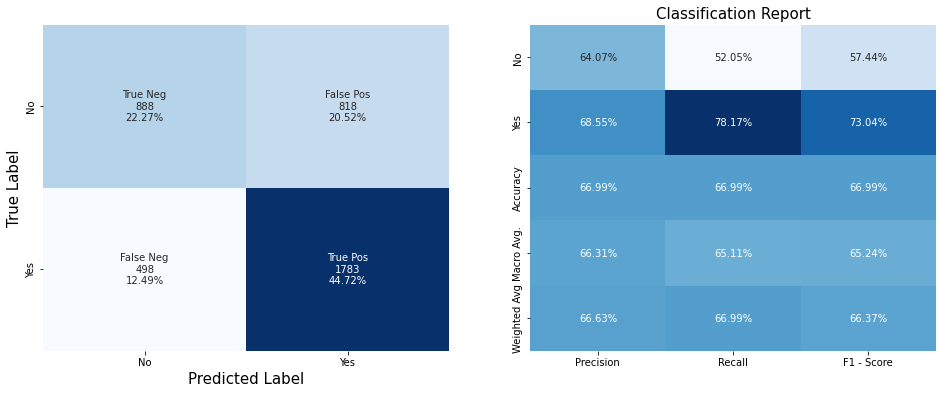

In [29]:
visualizations.class_results(y_test, knn_predict)

In [30]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

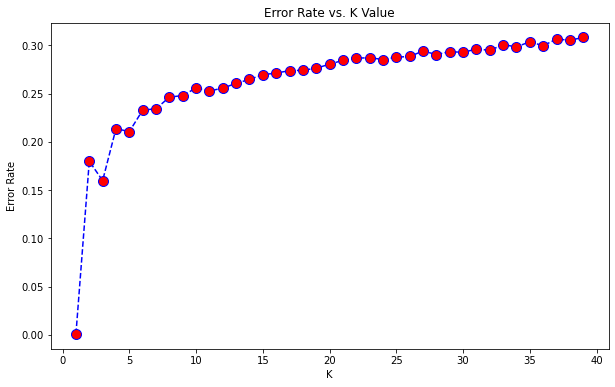

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Dimensionality Reduction

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [33]:
X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1989)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
pca = PCA()
X_train_reduced = pca.fit_transform(X_train)

In [35]:
cv = RepeatedKFold(n_splits=10, n_repeats=10)
logmodel = LogisticRegression()
accuracy = []

In [36]:
score = cross_val_score(logmodel, np.ones((len(X_train_reduced),1)), y_train, cv=cv).mean()    
accuracy.append(score)

for i in np.arange(1, 24):
    score = cross_val_score(logmodel, X_train_reduced, y_train, cv=cv).mean()
    accuracy.append(score)

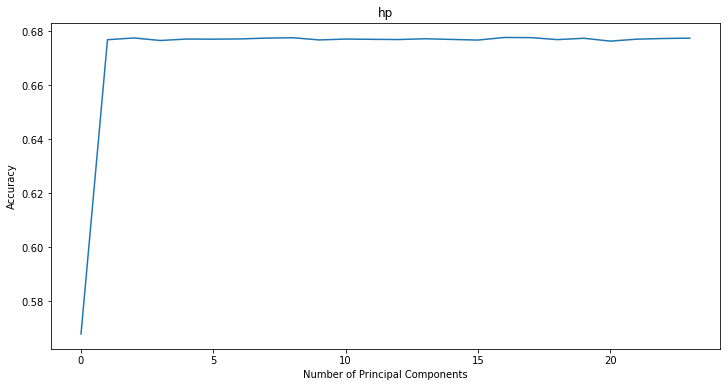

In [37]:
plt.figure(figsize=(12,6))
plt.plot(accuracy)
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('hp')
plt.show()

In [38]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  6.49,  11.74,  16.55,  20.48,  23.87,  26.66,  29.36,  31.91,
        34.33,  36.69,  39.01,  41.3 ,  43.42,  45.49,  47.52,  49.5 ,
        51.45,  53.35,  55.21,  57.05,  58.88,  60.69,  62.46,  64.22,
        65.97,  67.72,  69.46,  71.18,  72.9 ,  74.61,  76.29,  77.96,
        79.58,  81.16,  82.67,  84.13,  85.53,  86.84,  88.11,  89.29,
        90.44,  91.56,  92.56,  93.51,  94.39,  95.21,  96.  ,  96.74,
        97.4 ,  98.01,  98.58,  99.08,  99.48,  99.74,  99.9 ,  99.98,
       100.  , 100.  , 100.  , 100.  ])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1989)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [40]:
accuracy_score = []

for i in range(1, 60):
    pca = PCA(n_components=i)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.fit_transform(X_test)
    logmodel = LogisticRegression()
    logmodel.fit(X_train_reduced, y_train)
    predictions = logmodel.predict(X_test_reduced)
    score = metrics.accuracy_score(y_test, predictions)
    accuracy_score.append(score)

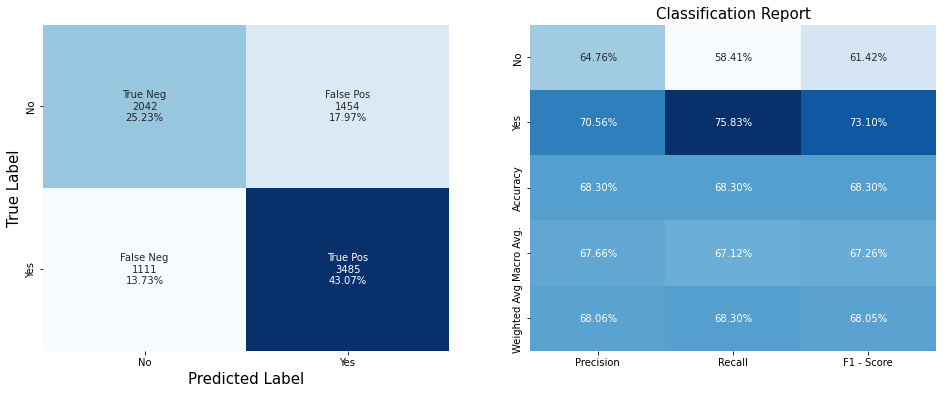

In [42]:
pca = PCA(n_components=60)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
logmodel = LogisticRegression()
logmodel.fit(X_train_reduced, y_train)
predictions = logmodel.predict(X_train_reduced)
visualizations.class_results(y_train, predictions)